# Venus Cloud-Top Wind Tracking
Using Akatsuki IR2 and UVI images to measure and compare zonal wind speeds in Venus’s upper atmosphere.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ir2_file = 'data/ir2_20160517_120822_202_l2b_v10.fit'
uvi_file = 'data/uvi_20160517_121341_283_l2b_v10.fit'

In [5]:
with fits.open(ir2_file) as ir2_hdul:
    ir2_data = ir2_hdul[1].data
    ir2_header = ir2_hdul[1].header

with fits.open(uvi_file) as uvi_hdul:
    uvi_data = uvi_hdul[1].data
    uvi_header = uvi_hdul[1].header

In [7]:
def normalize(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

ir2_norm = normalize(ir2_data)
uvi_norm = normalize(uvi_data)

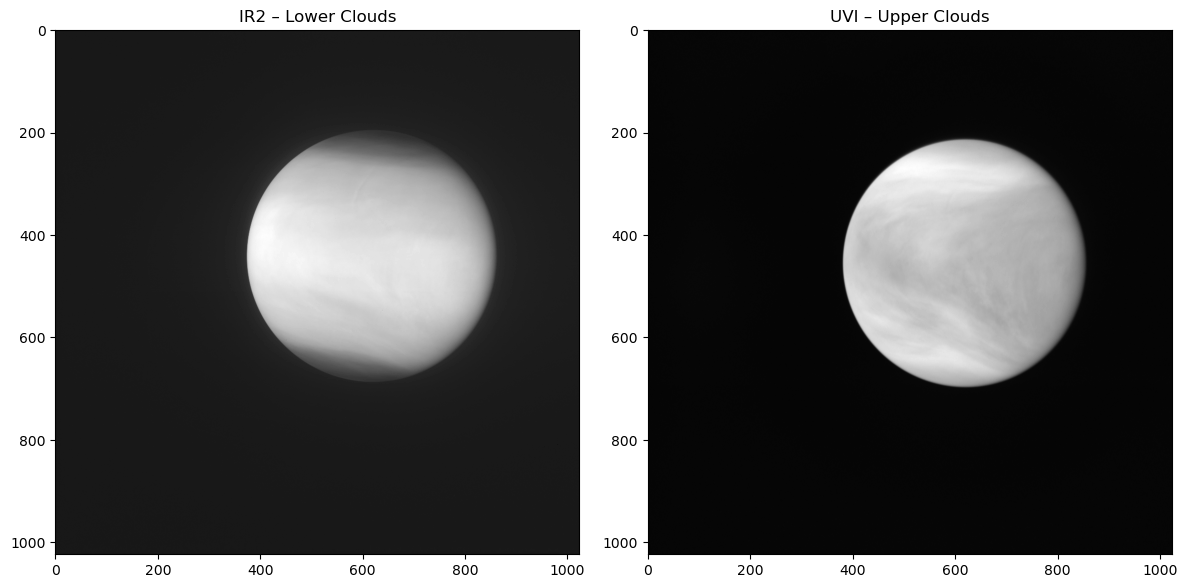

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(ir2_norm, cmap='gray')
axs[0].set_title('IR2 – Lower Clouds')

axs[1].imshow(uvi_norm, cmap='gray')
axs[1].set_title('UVI – Upper Clouds')

plt.tight_layout()
plt.show()

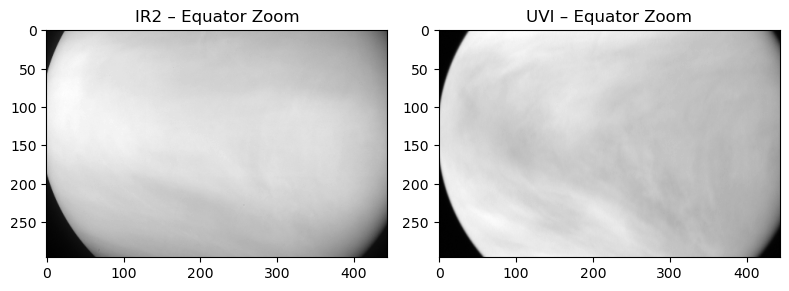

In [27]:
# Zoom into the equator for closer analysis

# Vertical (latitude) crop
y_start = 320
y_end = 616

# Horizontal (longitude) zoom
x_start = 382
x_end = 826    

# Crop both images
ir2_zoom = ir2_data[y_start:y_end, x_start:x_end]
uvi_zoom = uvi_data[y_start:y_end, x_start:x_end]

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(ir2_zoom, cmap='gray', aspect='equal')
axs[0].set_title('IR2 – Equator Zoom')

axs[1].imshow(uvi_zoom, cmap='gray', aspect='equal')
axs[1].set_title('UVI – Equator Zoom')

plt.tight_layout()
plt.show()

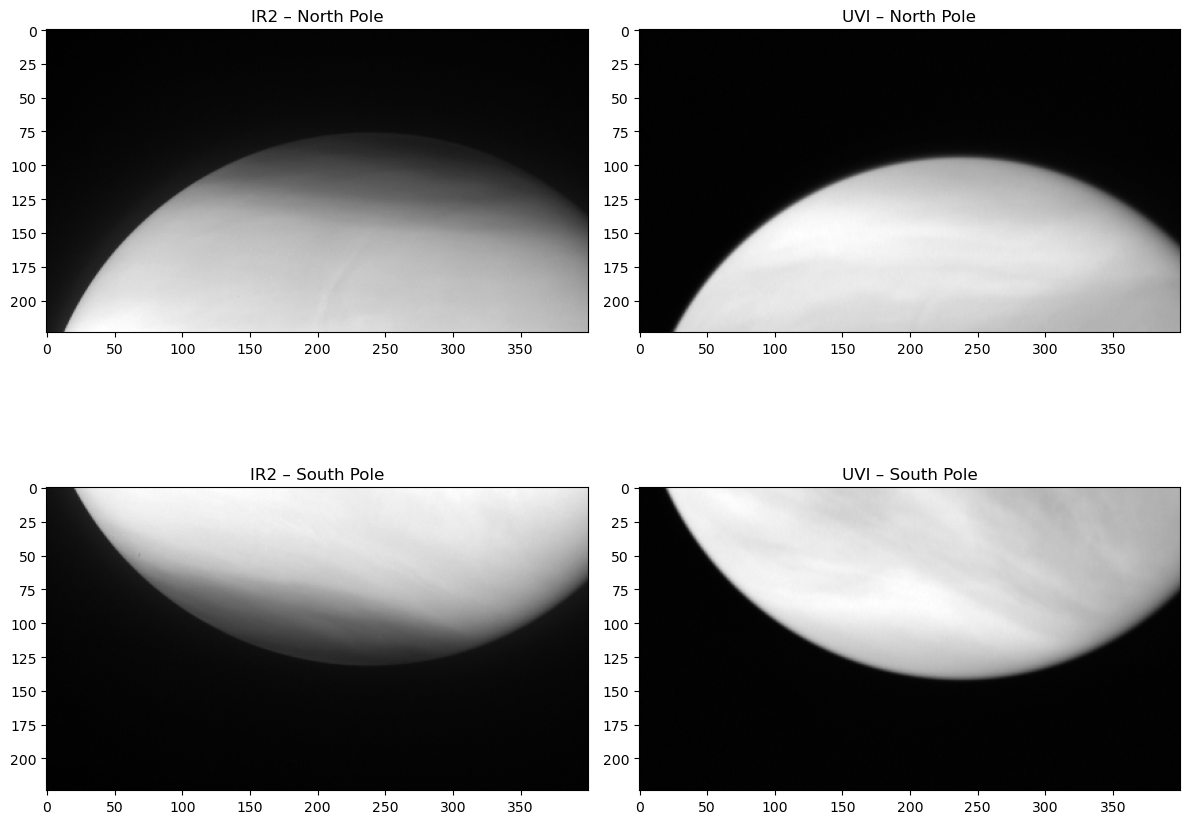

In [39]:
# Polar zoom
crop_height = 224
crop_width = 400

# Center the X as before
x_start = 382
x_end = x_start + crop_width

# North Pole
y_start_n = 120
y_end_n = y_start_n + crop_height

ir2_north = ir2_data[y_start_n:y_end_n, x_start:x_end]
uvi_north = uvi_data[y_start_n:y_end_n, x_start:x_end]

# South Pole
y_end_s = 780
y_start_s = y_end_s - crop_height

ir2_south = ir2_data[y_start_s:y_end_s, x_start:x_end]
uvi_south = uvi_data[y_start_s:y_end_s, x_start:x_end]


fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# North Pole Plot
axs[0, 0].imshow(ir2_north, cmap='gray', aspect='equal')
axs[0, 0].set_title('IR2 – North Pole')

axs[0, 1].imshow(uvi_north, cmap='gray', aspect='equal')
axs[0, 1].set_title('UVI – North Pole')

# South Pole Plot
axs[1, 0].imshow(ir2_south, cmap='gray', aspect='equal')
axs[1, 0].set_title('IR2 – South Pole')

axs[1, 1].imshow(uvi_south, cmap='gray', aspect='equal')
axs[1, 1].set_title('UVI – South Pole')

plt.tight_layout()
plt.show()